<a href="https://colab.research.google.com/github/dubeyabhi07/classical-ml-with-sklearn/blob/master/Ensembles/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

In [2]:
print(mnist.target)
print(mnist.data.shape)

['5' '0' '4' ... '4' '5' '6']
(70000, 784)


In [3]:
import pandas as pd
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

X = mnist_df[0:5000]
Y = mnist.target[0:5000]
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2, random_state=30, stratify=Y)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = False,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.947
0.9462206397832343


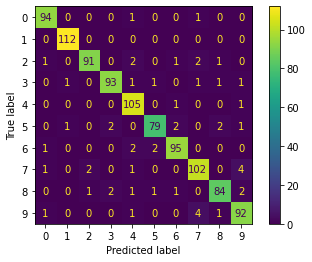

In [7]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
x = plot_confusion_matrix(model, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,model.predict(X_test)))
print(metrics.f1_score(y_test,model.predict(X_test),average='macro'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1000, 10)


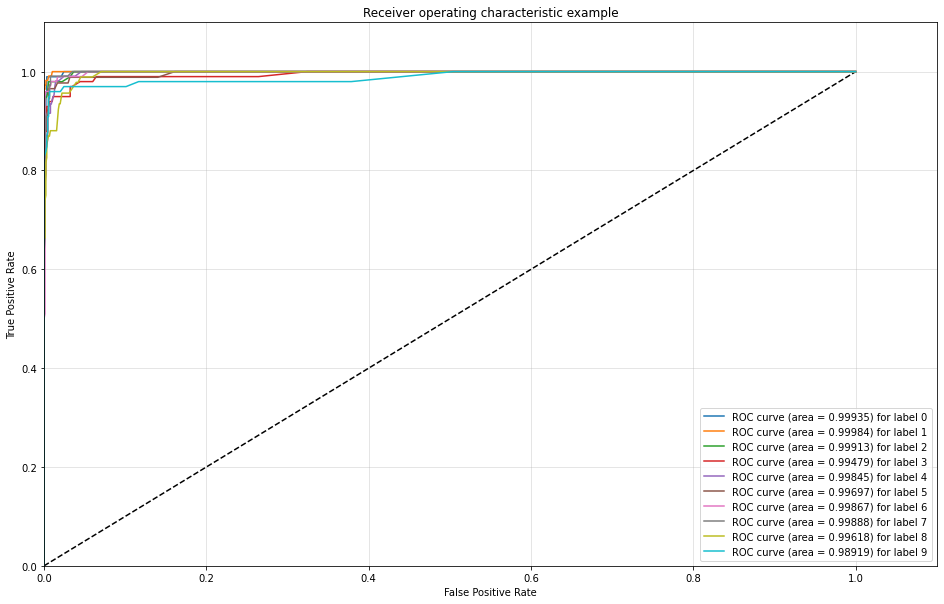

In [ ]:

from sklearn.metrics import *
import seaborn as sns
roc_auc_scores = []
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = model.predict_proba(X_test)
    print(y_score.shape)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once (1-hot-encoding)
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        roc_auc_scores.append(roc_auc_score(y_test_dummies[:,i],y_score[:,i]))

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.1])
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.5f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

plot_multiclass_roc(model, X_test, y_test, n_classes=10, figsize=(16, 10))

In [ ]:
print(roc_auc_scores)

[0.9993547197640118, 0.999839124839125, 0.9991289198606271, 0.9947925425172928, 0.9984510889472638, 0.9969722148783221, 0.9986722222222222, 0.998876404494382, 0.9961753016663475, 0.9891927039540802]


# Feature Importance:
- In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction.

- we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method.

In [ ]:
imp = model.feature_importances_
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X.columns, imp)]

In [ ]:
sortedImportance = sorted(feature_importances,key = lambda x: x[1],reverse=True)
print(sortedImportance)

[('pixel379', 0.00932), ('pixel351', 0.0092), ('pixel462', 0.00853), ('pixel438', 0.00804), ('pixel378', 0.00761), ('pixel156', 0.0076), ('pixel407', 0.00736), ('pixel406', 0.00709), ('pixel403', 0.00689), ('pixel212', 0.00687), ('pixel489', 0.00686), ('pixel240', 0.00667), ('pixel211', 0.0066), ('pixel155', 0.00647), ('pixel102', 0.00638), ('pixel434', 0.00635), ('pixel435', 0.00626), ('pixel515', 0.00618), ('pixel213', 0.00608), ('pixel568', 0.00605), ('pixel291', 0.00602), ('pixel324', 0.00602), ('pixel514', 0.00602), ('pixel657', 0.00602), ('pixel157', 0.00599), ('pixel376', 0.00599), ('pixel408', 0.00577), ('pixel543', 0.00577), ('pixel569', 0.00576), ('pixel461', 0.00574), ('pixel544', 0.0056), ('pixel431', 0.00558), ('pixel352', 0.00557), ('pixel239', 0.00556), ('pixel347', 0.00552), ('pixel375', 0.00547), ('pixel348', 0.00543), ('pixel488', 0.00538), ('pixel430', 0.00533), ('pixel463', 0.00519), ('pixel516', 0.00509), ('pixel487', 0.00506), ('pixel490', 0.00501), ('pixel374', 0

In [ ]:
sortedImportanceDf = pd.DataFrame({'feature': list(X.columns),
                   'importance': imp}).\
                    sort_values('importance', ascending = False)

sortedImportanceDf.head(20)

,feature,importance
378,pixel379,0.009321
350,pixel351,0.009204
461,pixel462,0.008534
437,pixel438,0.008040
377,pixel378,0.007605
155,pixel156,0.007598
406,pixel407,0.007356
405,pixel406,0.007091
402,pixel403,0.006889
211,pixel212,0.006867


[]

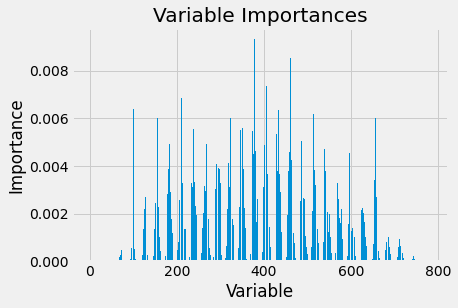

In [ ]:

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(X.columns)))
# Make a bar chart
plt.bar(x_values, imp, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');
plt.plot()

# Cross validation :

- There are a lot of parameters to tune 
  - Features which make predictions of the model better
      - n_estimators
      - max_features
      - bootstrap
      - max_depth
      - min_samples_split
      - min_samples_leaf
  - Features which will make the model training easier
      -  n_jobs : This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction.
      - **oob_score** : This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

# Cost Complexity Pruning:

 - Since cost_complexity_pruning_path() method is not available with random forest; alpha has to be selected manually.
  


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
scoring = {'Accuracy': 'accuracy','Rec_macro': make_scorer(recall_score, average='macro')}


clf = RandomForestClassifier(oob_score =True)

# Number of trees in random forest
n_estimators = [100,300,500]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
bootstrap = [True, False]


parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}


grid_random = RandomizedSearchCV(clf, parameters, cv=5,refit='Accuracy', scoring=scoring, return_train_score=False)

grid_random.fit(X_train, y_train)
print(grid_random)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_random.best_score_)
print(grid_random.best_params_)
print(grid_random.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
pd.DataFrame(grid_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_bootstrap,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_test_Rec_macro,split1_test_Rec_macro,split2_test_Rec_macro,split3_test_Rec_macro,split4_test_Rec_macro,mean_test_Rec_macro,std_test_Rec_macro,rank_test_Rec_macro
0,9.101320,0.049991,0.155049,0.001962,500,sqrt,True,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.93000,0.94250,0.95000,0.93000,0.93875,0.93825,0.007649,1,0.929088,0.941892,0.949605,0.927352,0.937866,0.937161,0.008235,1
1,0.978924,0.010631,0.038871,0.000805,100,log2,True,"{'n_estimators': 100, 'max_features': 'log2', ...",0.92500,0.93125,0.94000,0.93375,0.92625,0.93125,0.005420,6,0.924564,0.929993,0.939598,0.930864,0.923907,0.929785,0.005645,6
2,1.831915,0.003082,0.036722,0.000274,100,sqrt,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.92750,0.94000,0.94500,0.92250,0.93250,0.93350,0.008155,5,0.926544,0.939028,0.945033,0.919361,0.931241,0.932241,0.009045,5
3,0.015811,0.000904,0.000000,0.000000,100,sqrt,False,"{'n_estimators': 100, 'max_features': 'sqrt', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,2.929112,0.025767,0.105739,0.000505,300,log2,True,"{'n_estimators': 300, 'max_features': 'log2', ...",0.93625,0.94625,0.94000,0.92500,0.93750,0.93700,0.006919,2,0.935412,0.945555,0.939350,0.921656,0.936088,0.935612,0.007847,2
5,0.015451,0.000191,0.000000,0.000000,500,log2,False,"{'n_estimators': 500, 'max_features': 'log2', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,5.513104,0.048795,0.095201,0.001350,300,sqrt,True,"{'n_estimators': 300, 'max_features': 'sqrt', ...",0.93375,0.94250,0.94625,0.92375,0.93500,0.93625,0.007786,3,0.932668,0.941692,0.945469,0.920856,0.933686,0.934874,0.008503,3
7,4.918590,0.052936,0.164644,0.002002,500,log2,True,"{'n_estimators': 500, 'max_features': 'log2', ...",0.93500,0.94750,0.94000,0.92375,0.93125,0.93550,0.008008,4,0.933862,0.946471,0.939049,0.920494,0.929348,0.933845,0.008775,4
8,0.016063,0.001020,0.000000,0.000000,500,sqrt,False,"{'n_estimators': 500, 'max_features': 'sqrt', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.015496,0.000220,0.000000,0.000000,300,sqrt,False,"{'n_estimators': 300, 'max_features': 'sqrt', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


# Using hyperopt for parameter searching :

The stochastic expressions currently recognized by hyperopt's optimization algorithms are:

- hp.choice(label, options) : Returns one of the options, which should be a list or tuple. The elements of options can themselves be [nested] stochastic expressions. In this case, the stochastic choices that only appear in some of the options become conditional parameters.

- hp.randint(label, upper) : Returns a random integer in the range [0, upper). The semantics of this distribution is that there is no more correlation in the loss function between nearby integer values, as compared with more distant integer values. This is an appropriate distribution for describing random seeds for example. If the loss function is probably more correlated for nearby integer values, then you should probably use one of the "quantized" continuous distributions, such as either quniform, qloguniform, qnormal or qlognormal.

- hp.uniform(label, low, high) : Returns a value uniformly between low and high.
When optimizing, this variable is constrained to a two-sided interval.

- hp.quniform(label, low, high, q) : 
Returns a value like round(uniform(low, high) / q) * q
Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.

In [9]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from hyperopt import Trials
from hyperopt.pyll.base import scope

def hyperopt_train_test(params):
    clf = RandomForestClassifier(**params )
    score = cross_val_score(clf, X_train, y_train,cv=5,scoring='accuracy').mean()
    print("score {:.4f} params {}".format(score, params))
    return -score

trials= Trials()

space4rf = {
    'max_depth': scope.int(hp.quniform('max_depth',3,15,1)),
    'max_features': scope.int(hp.quniform('max_features',10,50,1)),
    'n_estimators': scope.int(hp.quniform('n_estimators',100,500,10)),
    'bootstrap' : hp.choice('bootstrap', [True, False])
}

best = fmin(hyperopt_train_test, trials= trials , space=space4rf, algo=tpe.suggest, max_evals=10)

score 0.9338 params {'bootstrap': True, 'max_depth': 12, 'max_features': 13, 'n_estimators': 310}
score 0.9307 params {'bootstrap': True, 'max_depth': 10, 'max_features': 35, 'n_estimators': 140}
score 0.9365 params {'bootstrap': True, 'max_depth': 15, 'max_features': 19, 'n_estimators': 410}
score 0.9383 params {'bootstrap': False, 'max_depth': 13, 'max_features': 14, 'n_estimators': 120}
score 0.8063 params {'bootstrap': False, 'max_depth': 4, 'max_features': 46, 'n_estimators': 380}
score 0.9343 params {'bootstrap': True, 'max_depth': 13, 'max_features': 42, 'n_estimators': 430}
score 0.8620 params {'bootstrap': True, 'max_depth': 5, 'max_features': 33, 'n_estimators': 240}
score 0.9375 params {'bootstrap': False, 'max_depth': 11, 'max_features': 48, 'n_estimators': 240}
score 0.9217 params {'bootstrap': False, 'max_depth': 8, 'max_features': 14, 'n_estimators': 350}
score 0.9330 params {'bootstrap': True, 'max_depth': 11, 'max_features': 21, 'n_estimators': 470}
100%|██████████| 10

In [10]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'bootstrap': 1, 'max_depth': 13.0, 'max_features': 14.0, 'n_estimators': 120.0}


In [15]:
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best_estimator = RandomForestClassifier(**best )
best_estimator.fit(X_train,y_train)


RandomForestClassifier(bootstrap=1, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

just checking .......................
0.9995
actual predictions ...................
0.941
0.9397458227961375


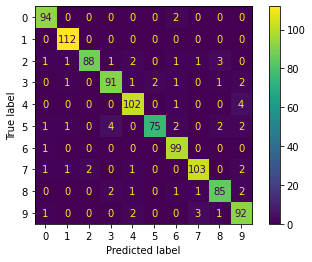

In [16]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(best_estimator, X_test, y_test,values_format = 'd')
print("just checking .......................")
print(metrics.accuracy_score(y_train,best_estimator.predict(X_train)))
print("actual predictions ...................")
print(metrics.accuracy_score(y_test,best_estimator.predict(X_test)))
print(metrics.f1_score(y_test,best_estimator.predict(X_test),average='macro'))

- This is a case of overfitting on the training set.

For more info : 
https://www.districtdatalabs.com/parameter-tuning-with-hyperopt
